In [1]:
# analysis.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Carregar os dados
data = pd.read_csv('data/output.csv')

In [3]:
# Converte a coluna 'Data (Pregão)' para datetime
data['Data (Pregão)'] = pd.to_datetime(data['Data (Pregão)'], format='%d/%m/%Y')

plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

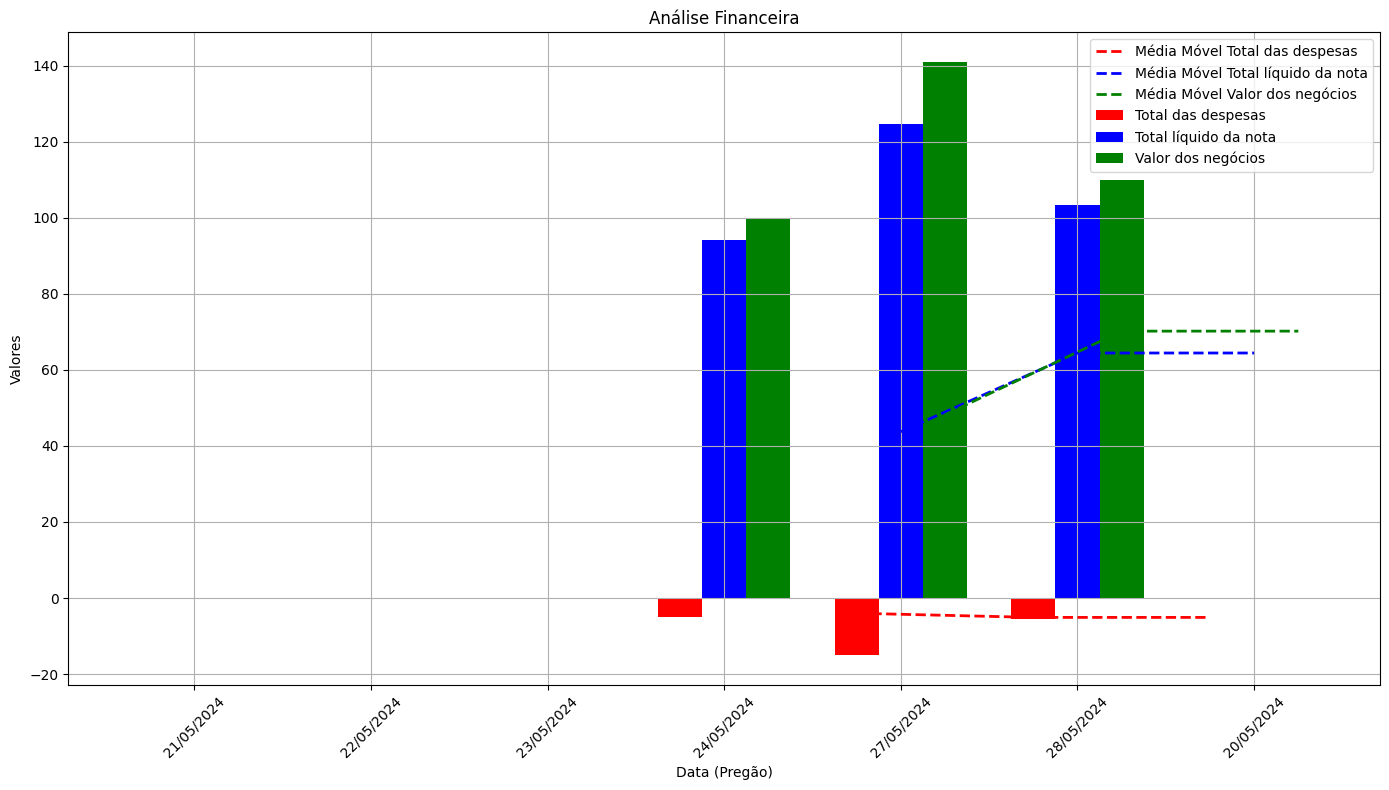

In [4]:
# Define a largura das barras
bar_width = 0.25
index = np.arange(len(data))

plt.figure(figsize=(14, 8))

# Plot Total das despesas
plt.bar(index, data['Total das despesas'], width=bar_width, label='Total das despesas', color='red')

# Plot Total líquido da nota
plt.bar(index + bar_width, data['Total líquido da nota'], width=bar_width, label='Total líquido da nota', color='blue')

# Plot Valor dos negócios
plt.bar(index + bar_width * 2, data['Valor dos negócios'], width=bar_width, label='Valor dos negócios', color='green')

# Calcular médias móveis
window_size = 5  # Define o tamanho da janela da média móvel
rolling_mean_total_despesas = data['Total das despesas'].rolling(window=window_size).mean()
rolling_mean_total_liquido_nota = data['Total líquido da nota'].rolling(window=window_size).mean()
rolling_mean_valor_negocios = data['Valor dos negócios'].rolling(window=window_size).mean()

# Adicionar linhas de média móvel
plt.plot(index, rolling_mean_total_despesas, color='red', linestyle='--', linewidth=2, label='Média Móvel Total das despesas')
plt.plot(index + bar_width, rolling_mean_total_liquido_nota, color='blue', linestyle='--', linewidth=2, label='Média Móvel Total líquido da nota')
plt.plot(index + bar_width * 2, rolling_mean_valor_negocios, color='green', linestyle='--', linewidth=2, label='Média Móvel Valor dos negócios')

plt.xlabel('Data (Pregão)')
plt.ylabel('Valores')
plt.title('Análise Financeira')

# Ajusta as posições das marcações no eixo x e as rotula com as datas
plt.xticks(index + bar_width, data['Data (Pregão)'].dt.strftime('%d/%m/%Y'), rotation=45)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


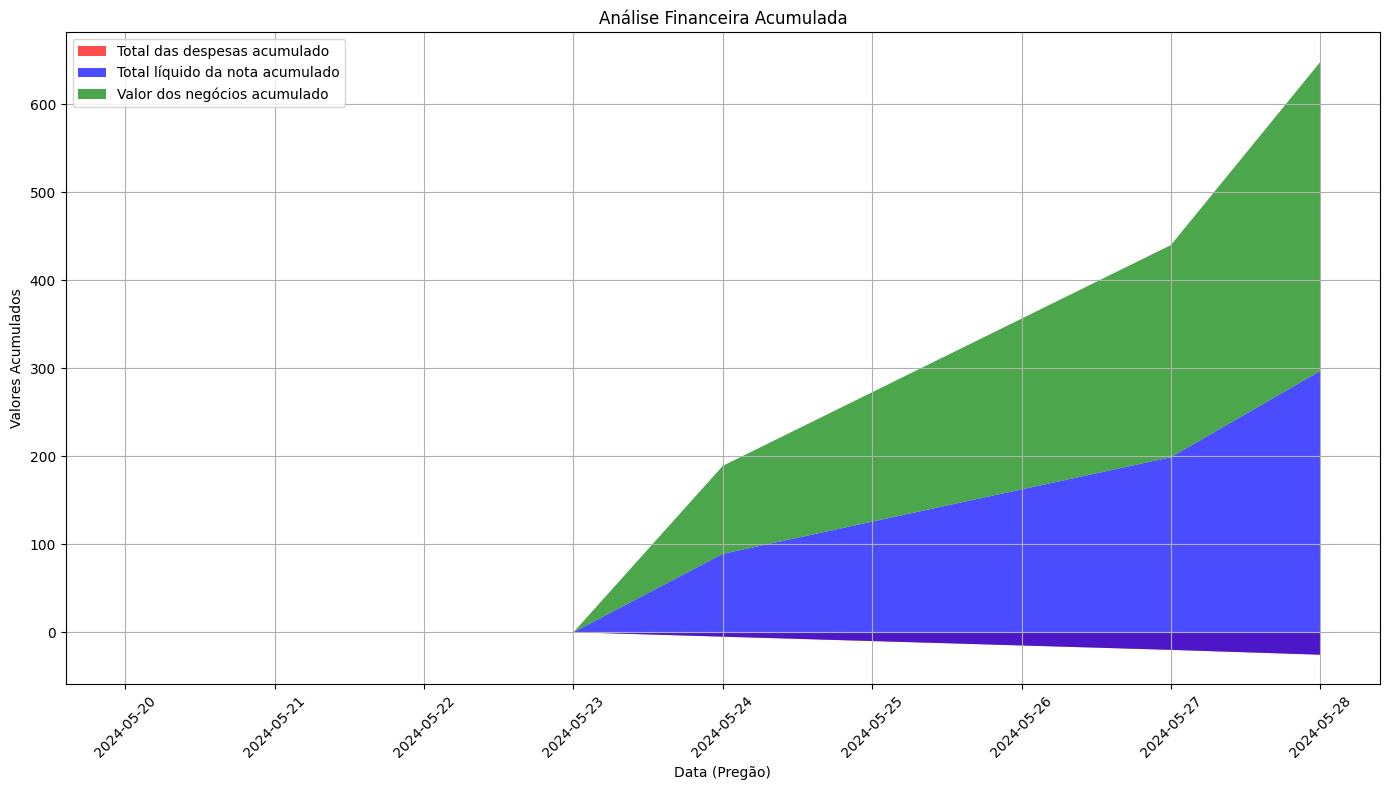

In [14]:
# Ordena os dados pela data para garantir que a acumulação está correta
data = data.sort_values('Data (Pregão)')

plt.figure(figsize=(14, 8))

# Plot gráfico de área empilhada
plt.stackplot(data['Data (Pregão)'],
              data['Total das despesas'].cumsum(),
              data['Total líquido da nota'].cumsum(),
              data['Valor dos negócios'].cumsum(),
              labels=['Total das despesas acumulado', 'Total líquido da nota acumulado', 'Valor dos negócios acumulado'],
              colors=['red', 'blue', 'green'],
              alpha=0.7)

plt.xlabel('Data (Pregão)')
plt.ylabel('Valores Acumulados')
plt.title('Análise Financeira Acumulada')

plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

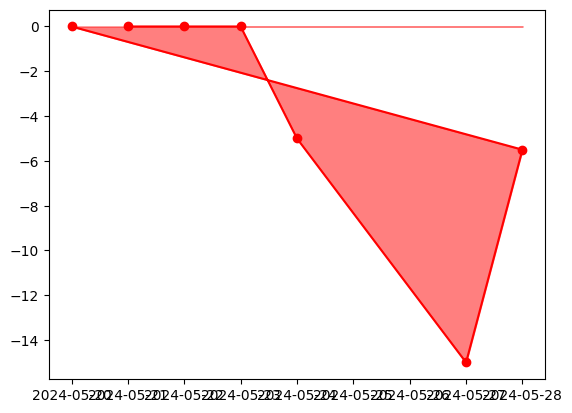

In [5]:
# Plot Total das despesas
plt.plot(data['Data (Pregão)'], data['Total das despesas'], label='Total das despesas', color='red', marker='o')

# Plot Total das despesas
plt.fill_between(data['Data (Pregão)'], data['Total das despesas'], label='Total das despesas', color='red', alpha=0.5)

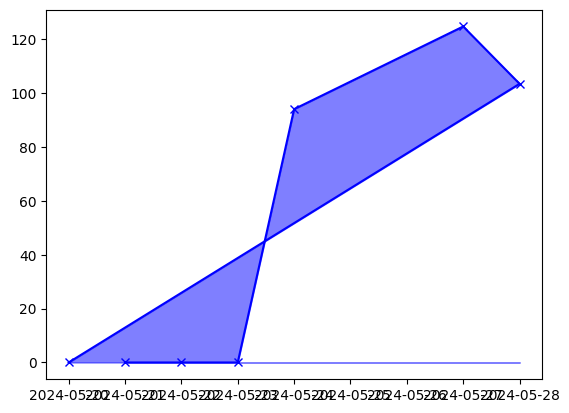

In [6]:
# Plot Total líquido da nota
plt.plot(data['Data (Pregão)'], data['Total líquido da nota'], label='Total líquido da nota', color='blue', marker='x')

# Plot Total líquido da nota
plt.fill_between(data['Data (Pregão)'], data['Total líquido da nota'], label='Total líquido da nota', color='blue', alpha=0.5)


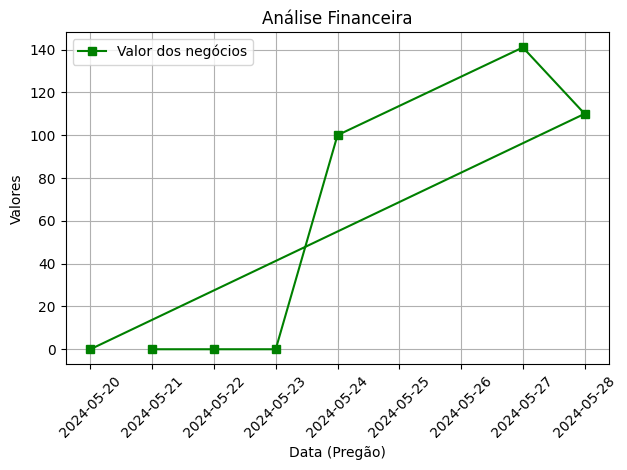

In [7]:
# Plot Valor dos negócios
plt.plot(data['Data (Pregão)'], data['Valor dos negócios'], label='Valor dos negócios', color='green', marker='s')

plt.xlabel('Data (Pregão)')
plt.ylabel('Valores')
plt.title('Análise Financeira')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

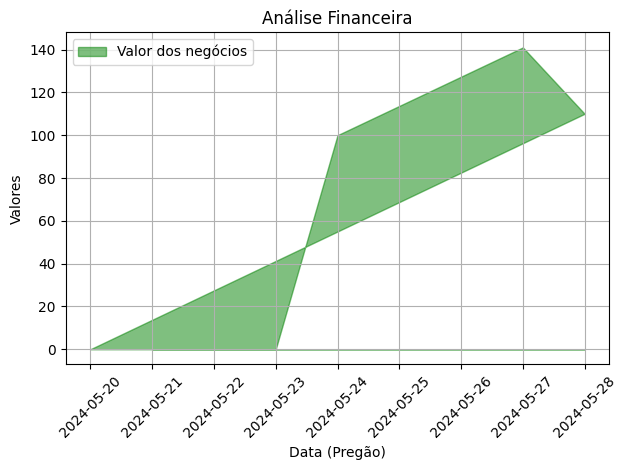

In [8]:

# Plot Valor dos negócios
plt.fill_between(data['Data (Pregão)'], data['Valor dos negócios'], label='Valor dos negócios', color='green', alpha=0.5)

plt.xlabel('Data (Pregão)')
plt.ylabel('Valores')
plt.title('Análise Financeira')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

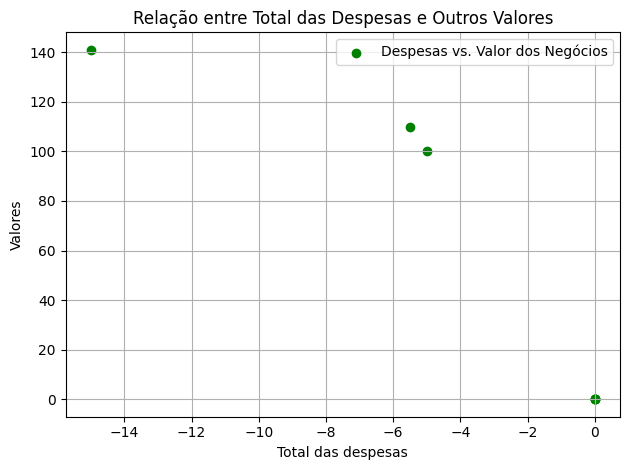

In [9]:
# Scatter plot Total das despesas vs. Valor dos negócios
plt.scatter(data['Total das despesas'], data['Valor dos negócios'], label='Despesas vs. Valor dos Negócios', color='green')

plt.xlabel('Total das despesas')
plt.ylabel('Valores')
plt.title('Relação entre Total das Despesas e Outros Valores')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()